#### Machine learning for mental Health

###### The project involves machine learning models that can assist in predicting mental health conditions, analyzing mental health-related data and creating tools that help in diagnosing or monitoring mental health conditions.


###### Our main objective is to predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset? 

###### Output Label is = seek_help 
###### Features = Age, Gender, self_employed, family_history, treatment, no_employees remote_work,tech_company, benefits, care_options, wellness_program seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence coworkers, supervisor, mental_health_interview, phys_health_interview mental_vs_physical, obs_consequence

#### Imports

In [51]:
import pandas as pd
import numpy as np

#### Data Preprocessing

In [52]:
path = 'survey.csv'
data = pd.read_csv(path)

In [53]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [54]:
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [56]:
data.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [57]:
data.drop(['comments','work_interfere', 'state', 'Timestamp'],  axis=1, inplace=True)

In [58]:
data.isna().sum()

Age                           0
Gender                        0
Country                       0
self_employed                18
family_history                0
treatment                     0
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
dtype: int64

In [59]:
# Assuming your DataFrame is called 'Data'
missing_percentages = (data.isna().mean() * 100).round(2)

print(missing_percentages)

Age                          0.00
Gender                       0.00
Country                      0.00
self_employed                1.43
family_history               0.00
treatment                    0.00
no_employees                 0.00
remote_work                  0.00
tech_company                 0.00
benefits                     0.00
care_options                 0.00
wellness_program             0.00
seek_help                    0.00
anonymity                    0.00
leave                        0.00
mental_health_consequence    0.00
phys_health_consequence      0.00
coworkers                    0.00
supervisor                   0.00
mental_health_interview      0.00
phys_health_interview        0.00
mental_vs_physical           0.00
obs_consequence              0.00
dtype: float64


### Encoding

In [60]:
data

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [61]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
print(categorical_cols)


['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


In [63]:
for col in categorical_cols : 
    # Assuming your DataFrame is called 'Data'
    one_hot_col = pd.get_dummies(data[col], prefix=col)

    # Concatenate the new one-hot encoded columns with the original DataFrame
    data_encoded = pd.concat([data, one_hot_col], axis=1)

    # Drop the original 'gender' column
    data_encoded.drop(col, axis=1, inplace=True)

In [64]:
data_encoded

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence_No,obs_consequence_Yes
0,37,Female,United States,NaN,No,Yes,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,1,0
1,44,M,United States,NaN,No,No,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,1,0
2,32,Male,Canada,NaN,No,No,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,1,0
3,31,Male,United Kingdom,NaN,Yes,Yes,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,0,1
4,31,Male,United States,NaN,No,No,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,1,0
1255,32,Male,United States,No,Yes,Yes,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,1,0
1256,34,male,United States,No,Yes,Yes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,1,0
1257,46,f,United States,No,No,No,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,1,0


In [65]:
data_encoded.shape

(1259, 24)

In [66]:
data_encoded.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence_No            uint8
obs_consequence_Yes           uint8
dtype: object

In [44]:
print(data_encoded.select_dtypes(include='object').columns.tolist())


['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


###### Now there is no categorical columns in our data, great !!

### data visualization

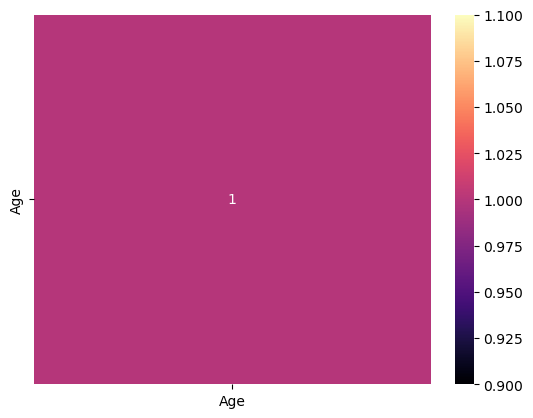

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a correlation matrix
corr_matrix = data.corr()

# create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='magma')

# show the plot
plt.show()


In [47]:
print(data.corr())


     Age
Age  1.0


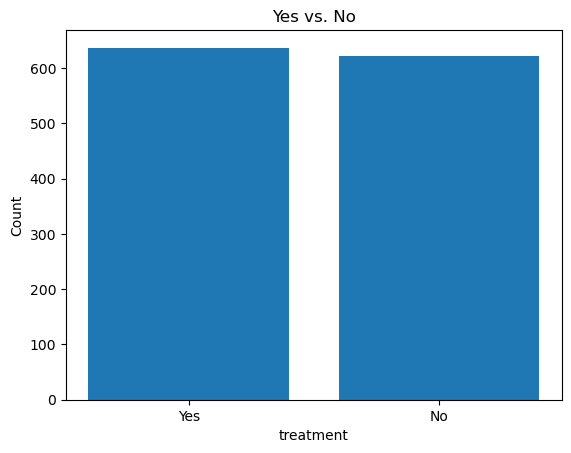

In [48]:
# Compute the counts for each value of the 'is_successful' attribute
counts = data['treatment'].value_counts()

# Create a bar plot of the counts
plt.bar(counts.index.astype(str), counts.values)

# Set the title and axis labels
plt.title('Yes vs. No')
plt.xlabel('treatment')
plt.ylabel('Treatment')

# Show the plot
plt.show()